In [24]:
import requests
from IPython.core.display import HTML


# Evaluating Classifiers
This exercise is about evaluation metrics for binary classification. 
The main focus is to evaluate a classification model, irrespective of which model (linear or non-linear) is being used.

**Info**
Recall that the confusion matrix for binary classification problems has the following structure:

$$
\begin{array}{cc|c|c|}
  & & \text{Predicted Negative} & \text{Predicted Positive} \\
\hline
\text{Actual Negative} & & TN & FP \\
\hline
\text{Actual Positive} & & FN & TP \\
\end{array}
$$
- **TN** - True Negative
- **FN** - False Negative 
- **FP** - False positive
- **TP** - True Positive



<article class="message">
    <div class="message-body">
        <strong>List of individual tasks</strong>
        <ul style="list-style: none;">
            <li>
            <a href="#import">Task 1: Generating Data</a>
            </li>
            <li>
            <a href="#First">Task 2: Training Support Vector Classifier</a>
            </li>
            <li>
            <a href="#accuracy">Task 3: Model accuracy</a>
            </li>
            <li>
            <a href="#classif_report">Task 4: Performance metrics</a>
            </li>
            <li>
            <a href="#svc_model">Task 5: Class Imbalance</a>
            </li>
            <li>
            <a href="#metrics">Task 6: ROC and Precision-Recall curves</a>
            </li>
        </ul>
    </div>
</article>

## Generating Data

---
**Task 1 (easy): Generating Data👩‍💻**
1. Run the cell below to generate a dataset comprising of 500 samples, 20 features, and 2 classes. This dataset is partitioned using an 80-20 train-test split.


---

In [25]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import confusion_matrix, accuracy_score, precision_recall_curve, auc, average_precision_score, roc_curve
from sklearn.svm import SVC, LinearSVC
from sklearn.dummy import DummyClassifier

import warnings
warnings.filterwarnings("ignore")


X,Y  = datasets.make_classification(n_samples=500, n_features=20, n_classes=2, random_state=1)
print('Dataset Size : ',X.shape,Y.shape)

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.80, test_size=0.20, stratify=Y, random_state=1)
print('Train/Test Size : ', X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

Dataset Size :  (500, 20) (500,)
Train/Test Size :  (400, 20) (100, 20) (400,) (100,)


## Performance Metrics
In the following task you will evaluate the model's performance on the test data using different metrics. 

---
**Task 2 (easy): Training Support Vector Classifier👩‍💻**
1. Run the cell below to train a Linear Support Vector Classifier ([`LinearSVC`
](https://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html)
).


---

In [26]:
classifier1 = LinearSVC(random_state=1, C=0.1)
classifier1.fit(X_train, Y_train)

LinearSVC(C=0.1, random_state=1)


---
**Task 3 (easy): Model accuracy👩‍💻**
Classification accuracy is given by 
$$ \text{accuracy} = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}}$$
 
Run the following cell to make predictions using the `LinearSVC`
 on the test and training sets. Calculate accuracy by comparing predictions to actual labels: 
1. Calculate model accuracy on the training set.
2. Calculate model accuracy on the test set.
3. Run the cell below to construct and plot the confusion matrix of the model predictions on the training set. 
4. Construct and plot the confusion matrix of the model predictions on the test set. 


---

Training Accuracy: 0.51375
Test Accuracy: 0.545


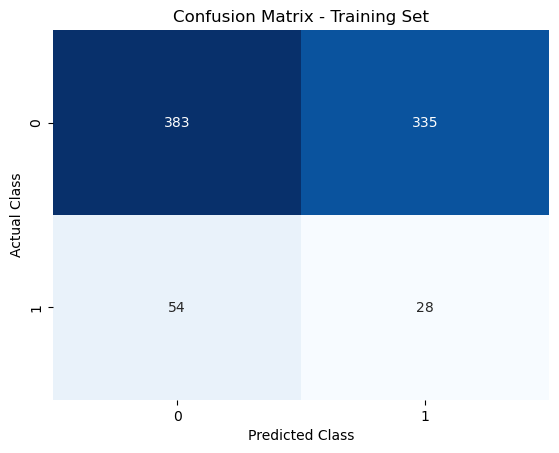

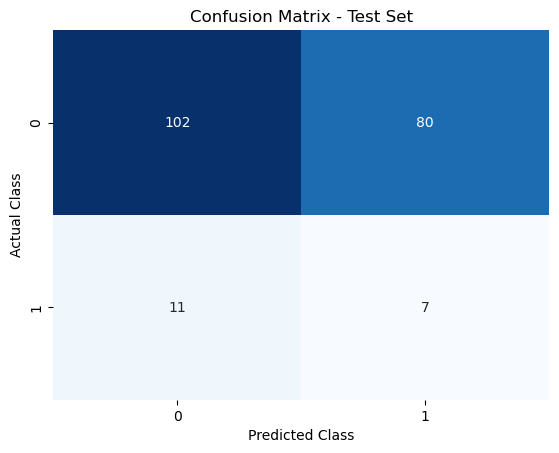

In [ ]:
Y_preds_on_test = classifier1.predict(X_test)
Y_preds_on_train = classifier1.predict(X_train)

# 1.Model accuracy on the training set
train_accuracy = accuracy_score(Y_train, Y_preds_on_train)
print("Training Accuracy:", train_accuracy)

# 2. Model accuracy on the test set
test_accuracy = accuracy_score(Y_test, Y_preds_on_test)
print("Test Accuracy:", test_accuracy)

# 3. Confusion matrix for the training set
conf_mat_train = confusion_matrix(Y_train, Y_preds_on_train)
sns.heatmap(conf_mat_train, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Training Set')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

# 4. Confusion matrix for the test set
conf_mat_test = confusion_matrix(Y_test, Y_preds_on_test)
sns.heatmap(conf_mat_test, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix - Test Set')
plt.xlabel('Predicted Class')
plt.ylabel('Actual Class')
plt.show()

**Performance metrics**

**Recall from the lecture**
Performance metrics such as **precision**, **recall**, **F$_1$-score**, and **specificity**  provide different views of the performance of the classifier.
- **Precision** - or positive predictive value, represents how many predictions of the positive class actually belong to that class. 

$$
\frac{𝑇𝑃}{𝑇𝑃+𝐹𝑃}
$$


- **Recall** -  also known as sensitivity, true positive rate, or hit rate assesses whether the classifier correctly identifies positive instances out of the total actual postive instances. 

$$
\frac{𝑇𝑃}{𝑇𝑃+𝐹𝑁} 
$$


- **F1-score** - harmonic mean of precision & recall. 

$$
2∗\frac{\text{Precision}∗\text{Recall}}{\text{Precision}+\text{Recall}} 
$$


- **Specificity** - also known as the true negative rate, is the percentage of correctly predicted instances of the negative class. 

$$
\frac{TN}{TN+FP} 
$$





---
**Task 4 (easy): Performance metrics👩‍💻💡**
1. Use the confusion matrix from [Task 3](#accuracy) to find and store the true positive, false positive, true negative and false negative values. 

2. In the cell below calculate calculate the following evaluation metrics for the classification model:
    - Precision
    - Recall
    - F1-score
    - Specificity


3. Inspect the metrics and reflect on how they individually help in understanding and evaluating the performance of a classification model?



---

## Task 4 reflection

## Imbalanced Classes
The cell below generates a dataset with 1,000 samples across 10 classes. Then an imbalanced dataset is created by combining 9 classes such that all samples in class 0 are marked as positive, while samples in the remaining classes are marked as negative. This results in a 10% positive and 90% negative distribution.


In [29]:
X, Y = datasets.make_classification(n_samples=1000, n_classes=10, n_informative=10)

# Mark the minority class as True
Y = (Y == 0).astype(int)

print('Dataset Size:', X.shape, Y.shape)

# Check the imbalance ratio
imbalance_ratio_actual = np.mean(Y)
print(f'Imbalance Ratio (Positive/Minority Class): {imbalance_ratio_actual:.2f}')

Dataset Size: (1000, 20) (1000,)
Imbalance Ratio (Positive/Minority Class): 0.10



---
**Task 5 (hard): Class Imbalance👩‍💻💡**
The following task will evaluate `classifier2`
 on the imbalanced dataset.
1. The cell below includes the classifier, variables to store performance metrics, and an incomplete for-loop that performs data splitting for 5-fold cross-validation. Complete the loop to:
    - Train `classifier2`
 on the training folds. 
    - Predict labels on the validation folds.
    - Calculate accuracy on the validation folds and store the values.


2. Run the cell below to plot the accuracy of the model on each fold. What does the plot tell you about classification performance?

3. Extend the loop to calculate the confusion matrix and the performance metrics on the validation sets (precision, recall, F1-Score, specificity). Print the average of each metric (use `np.nanmean()`
 as some of these metrics might inlcude NaNs). 

4. Why do some of the metrics return NaNs?

5. Is the model able to reliably identify the minority class? What are the implications for the model's performance and its practical utility?

6. Run the cell below to plot all the metrics in the same plot. Are certain metrics consistently lower, especially for the minority class? What might this indicate about the model’s handling of the imbalanced data?



---

Average Accuracy: 0.9019999999999999
Average Precision: 1.0
Average Recall: 0.022857142857142857
Average F1-Score: 0.04318181818181818
Average Specificity: 1.0


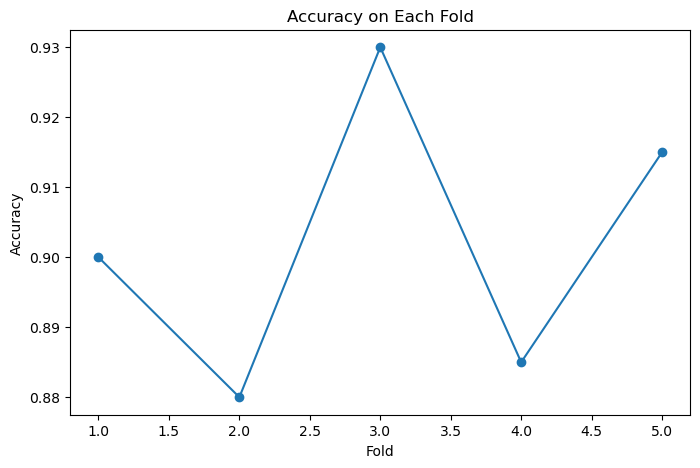

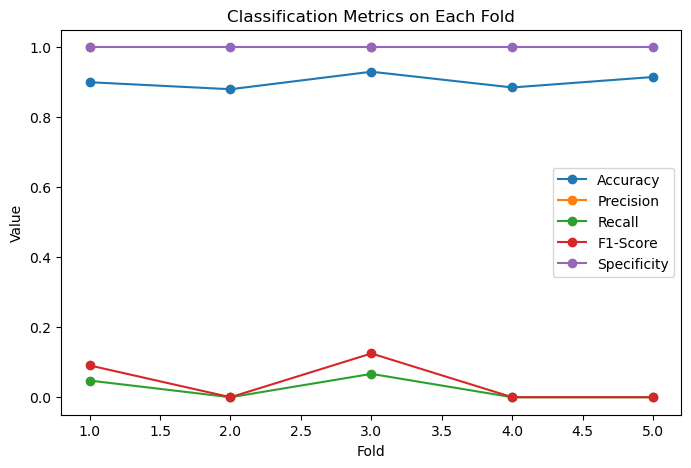

In [ ]:
# Given classifier and initialization (Subtask 1)
classifier2 = SVC()

# Initialize lists for metrics
accuracies, precisions, recalls, f1_scores, specificities = [], [], [], [], []

# 5-fold cross-validation
kf = KFold(n_splits=5, shuffle=True)

# Subtask 1: Complete the loop to train, predict, and store accuracy
for train_idx_svc, test_idx_svc in kf.split(X):
    # Split the data into training and validation sets
    X_train, X_test = X[train_idx_svc], X[test_idx_svc]
    Y_train, Y_test = Y[train_idx_svc], Y[test_idx_svc]
    
    # Train the classifier on the training set
    classifier2.fit(X_train, Y_train)
    
    # Predict on the validation set
    Y_pred = classifier2.predict(X_test)
    
    # Calculate and store accuracy
    accuracy = accuracy_score(Y_test, Y_pred)
    accuracies.append(accuracy)
    
    # Subtask 3: Calculate and store additional metrics (precision, recall, F1-score, and specificity)
    precision = precision_score(Y_test, Y_pred, zero_division=np.nan)
    recall = recall_score(Y_test, Y_pred, zero_division=np.nan)
    f1 = f1_score(Y_test, Y_pred, zero_division=np.nan)
    precisions.append(precision)
    recalls.append(recall)
    f1_scores.append(f1)
    
    # Calculate confusion matrix and specificity
    cm = confusion_matrix(Y_test, Y_pred)
    if cm.shape == (2, 2):  # Check if confusion matrix is 2x2
        tn, fp, fn, tp = cm.ravel()
        specificity = tn / (tn + fp) if (tn + fp) > 0 else np.nan
    else:
        specificity = np.nan
    specificities.append(specificity)

# Subtask 3: Print average metrics
print("Average Accuracy:", np.nanmean(accuracies))
print("Average Precision:", np.nanmean(precisions))
print("Average Recall:", np.nanmean(recalls))
print("Average F1-Score:", np.nanmean(f1_scores))
print("Average Specificity:", np.nanmean(specificities))

# Subtask 2: Run the cell to plot accuracy per fold
plt.figure(figsize=(8, 5))
plt.plot(range(1, 6), accuracies, marker='o')
plt.title('Accuracy on Each Fold')
plt.xlabel('Fold')
plt.ylabel('Accuracy')
plt.show()

# Subtask 6: Plot all metrics per fold
metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'Specificity']
metric_values = [accuracies, precisions, recalls, f1_scores, specificities]

plt.figure(figsize=(8, 5))
for i, metric_values_list in enumerate(metric_values):
    plt.plot(range(1, 6), metric_values_list, marker='o', label=metrics[i])

plt.title('Classification Metrics on Each Fold')
plt.xlabel('Fold')
plt.ylabel('Value')
plt.legend()
plt.show()

## Task 5 reflections

**Why do some metrics return NaNs?**

Some metrics may return NaNs because there could be situations where the denominator in their calculation becomes zero. For example:

* Precision: If there are no positive predictions (i.e., the model predicted all instances as the majority class), the precision calculation will involve dividing by zero, leading to NaN.
* Recall: If the validation set does not contain any actual positive instances (i.e., there are no true instances of the minority class), recall cannot be computed, resulting in NaN.
* Specificity: If there are no negative instances in the validation set (i.e., all instances are of the minority class), specificity can also result in a division by zero.

These NaN values indicate that the metric was not calculable due to the absence of certain conditions in the dataset, often stemming from the imbalanced nature of the data where one class is highly underrepresented.

**Is the model able to reliably identify the minority class? Discuss implications.**

The model's ability to reliably identify the minority class depends on the observed metrics, particularly precision, recall, and F1-score for the minority class. In many cases with imbalanced data:

* Low Recall: A low recall indicates that the model fails to identify many of the true instances of the minority class, which is critical for the model's utility if those instances are of high importance (e.g., detecting fraudulent transactions or rare diseases).
* Low Precision: If precision for the minority class is low, it suggests that many of the instances predicted as the minority class are false positives, reducing trust in those predictions.
* Consistently Low F1-Score: A low F1-score combines both low precision and low recall, showing that the model's overall performance in identifying the minority class is poor.
* Specificity: A relatively high specificity might suggest that the model is better at correctly identifying the majority class but struggles with the minority class.

Implications: If the metrics show that precision, recall, and F1-score for the minority class are consistently lower than for the majority class, it indicates that the model is biased towards the majority class due to class imbalance. This can severely limit the model’s practical utility, especially in cases where correctly identifying the minority class is crucial. To address this, techniques such as resampling, cost-sensitive learning, or using more sophisticated models that handle imbalance better (e.g., ensemble methods or algorithms tailored for imbalanced data) should be considered.


## ROC Curves and Precision-Recall Curves
This task examines the ROC (Receiver Operating Characteristic) curve and the Precision-Recall curve for the classifier trained on the imbalanced dataset. The ROC curve illustrates the trade-off between true positive rate (sensitivity) and false positive rate, while the Precision-Recall curve shows the balance between precision and recall.

---
**Task 6 (medium): ROC and Precision-Recall curves👩‍💻💡**
The cell below divides the dataset (imbalanced) into a training and a test set. It also calculates both the ROC curve and the Precision-Recall curve and extracts relevant metrics such as: `fpr`
 (False Positive Rate), `tpr`
 (True Positive Rate or **recall**), and **precision**.
1. Run the cell below to plot the ROC curve and the Precision-Recall curve.
2. Use the confusion matrix metrics to argue how the plots provide different insights into the classification model's ability to handle class imbalance? 
3. Describe when and why you would prioritize one curve over the other when dealing with imbalanced data.


---

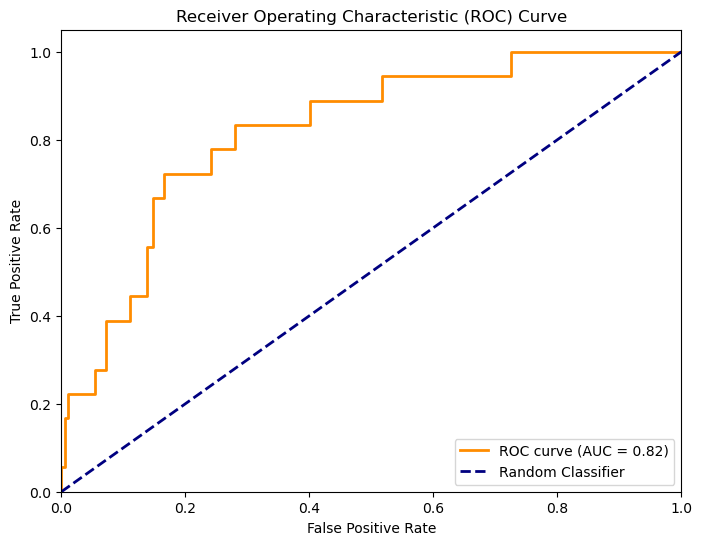

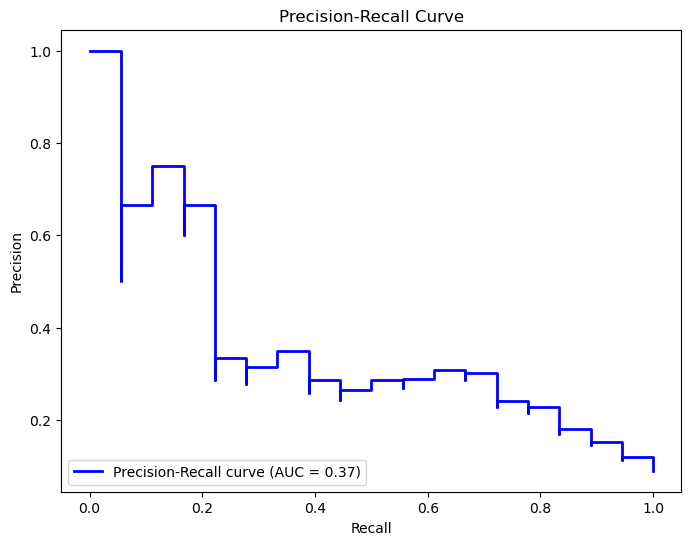

In [39]:
X_train, X_test = X[train_idx_svc], X[test_idx_svc]
Y_train, Y_test = Y[train_idx_svc], Y[test_idx_svc]

# ROC curve
decision_function = classifier2.decision_function(X_test)
fpr, tpr, _ = roc_curve(Y_test, decision_function)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall curve
precision, recall, _ = precision_recall_curve(Y_test, decision_function)
pr_auc = average_precision_score(Y_test, decision_function)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', lw=2, label='Precision-Recall curve (AUC = %0.2f)' % pr_auc)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')
plt.show()

## Task 6

### Insights

**ROC Curve Insights:**

The ROC curve plots the true positive rate (TPR) against the false positive rate (FPR), providing an overview of the model's performance across different classification thresholds.
For an imbalanced dataset, the ROC curve might still appear to show good performance due to the dominance of the majority class. This is because the FPR can remain low even when the model fails to correctly identify the minority class, leading to potentially misleading conclusions.

**Precision-Recall Curve Insights:**
The PR curve focuses on the relationship between precision and recall, giving a clearer picture of the model's ability to detect the minority class.
In highly imbalanced datasets, the PR curve often reveals more about the model's effectiveness because it directly considers false positives in relation to true positives, without being diluted by true negatives.
A steep drop in precision at lower recall values indicates that the model struggles with false positives when trying to capture more true positives, highlighting issues with class imbalance.

### When to Prioritize One Curve Over the Other**

**Prioritize the ROC Curve:**

When the classes are balanced or when both positive and negative outcomes are equally important.
It gives a good overall view of the model's ability to distinguish between classes, especially when both TPR and FPR matter.
For example, in cases where you need a general measure of performance without focusing solely on one class (e.g., binary classification with balanced classes).

**Prioritize the Precision-Recall Curve:**

When dealing with imbalanced data, where the minority class is more critical (e.g., detecting rare events like fraud, disease diagnosis, or fault detection).
The PR curve is more informative in these situations because it focuses on the model's positive predictive power and its ability to capture true positives.
This curve helps highlight the trade-off between precision and recall, which is crucial when false positives are more costly or when maximizing true positive detection is a priority.
Conclusion: For imbalanced datasets, the PR curve is generally a better indicator of model performance, as it directly reflects the challenges of handling the minority class and avoids being overshadowed by the large number of true negatives present in the ROC curve.